# Neural Network - Sonar Data

Overview: Data set [description](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)

Predictors are attributes named `X1` through `X60`.  Response variable is `target`.

Objective: develop feed-forward neural network to predict the `target`.

Algorithm: [MLPClassifer](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=MLPClassifier)

sklearn neural network [user guide](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)


In [3]:
import numpy as np
import pandas as pd

## Read in raw data

In [4]:
#
# read in csv file
#
raw = pd.read_csv('./sonar.csv')
raw.shape

(208, 61)

In [5]:
# display sample
raw.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X52,X53,X54,X55,X56,X57,X58,X59,X60,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
#
# Descriptive statistics for predictors
#
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
X2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
X3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
X4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
X5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
X6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
X7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
X8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
X9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
X10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [7]:
#
# Overview of target variable
#
raw.target.value_counts()

M    111
R     97
Name: target, dtype: int64

In [8]:
#
# Calculate fraction of each response value
#
raw.target.value_counts()/raw.target.count()

M    0.533654
R    0.466346
Name: target, dtype: float64

## Create train/test data sets

In [9]:
#
# create dataframe containing only predictors X1 through X60
#

# generate predictor names
predictors = ['X'+str(n) for n in range(1,61)]

print('first 5 predictors:', predictors[:5])
print('\nlast 5 predictors:',predictors[-5:])

first 5 predictors: ['X1', 'X2', 'X3', 'X4', 'X5']

last 5 predictors: ['X56', 'X57', 'X58', 'X59', 'X60']


In [10]:
# create data frame
raw_X = raw.loc[:,predictors]
raw_X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [11]:
#
# translate response attribute from 'M'/'R' to 1/0
#
raw_y = raw.target.map(dict(M=1,R=0))
raw_y.value_counts()/raw_y.count()

1    0.533654
0    0.466346
Name: target, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
#
# 70%/30% split train/test data set
# set random seed for repeatability
#
train_X, test_X, train_y, test_y = train_test_split(raw_X, raw_y, test_size=0.3, random_state=39)

In [13]:
print('training response attribute profile\n',train_y.value_counts()/train_y.count())

training response attribute profile
 1    0.531034
0    0.468966
Name: target, dtype: float64


In [14]:
print('test response attribute profile\n', test_y.value_counts()/test_y.count())

test response attribute profile
 1    0.539683
0    0.460317
Name: target, dtype: float64


## Train neural network model

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [16]:
#
# define neural network model architecture
# one hidden layer with 10 nodes
#
nn = MLPClassifier(hidden_layer_sizes=(10,),max_iter=2000, random_state=31)

In [17]:
#
# fit model to training data
#
nn.fit(train_X,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=31, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [18]:
print('Accuracy: {:.2f}%'.format(100 * accuracy_score(test_y,nn.predict(test_X))))

Accuracy: 69.84%


In [19]:
#
# Try standardizing the predictors
#

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [20]:
#
# refit model with standardized predictors
#
nn = MLPClassifier(hidden_layer_sizes=(10,),max_iter=2000, random_state=31)

# transform predictors into standardize form
ss_train_X = ss.fit_transform(train_X)

# train model
nn.fit(ss.fit_transform(train_X),train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=31, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [21]:
# transform test data into standardized form
ss_test_X = ss.transform(test_X)

# check accuracy for standardized predictors
print('accuracy: {:.2f}%'.format(100*accuracy_score(test_y,nn.predict(ss_test_X))))

accuracy: 73.02%


## Test alternative network architectures

In [22]:
# 
# define network alternatives
#
hidden_layers = [
    (10,), # 1 hidden layer, 10 nodes
    (20,), # 1 hidden layer, 20 nodes
    (50,), # 1 hidden layer, 50 nodes
    (100,), # 1 hidden layer, 100 nodes
    (25,25), # 2 hidden layers, 25 nodes/25 nodes
    (40,40), # 2 hidden layers, 40 nodes/40 nodes
    (50, 25), # 2 hidden layers, 50 nodes/25 nodes
    (25,25,25), # 3 hidden layers, 25 nodes/ 25 nodes/ 25 nodes
    (10,10,10), # 3 hidden layers, 10 nodes/ 10 nodes/ 10 nodes
    (25,25,25,25) # 4 hidden layers, 25 nodes/ 25 nodes/ 25 nodes/ 25 nodes
    ]

In [23]:
# try each network alternatives
results = []
for hls in hidden_layers:
    
    # print hidden layer specification
    print('\nhidden layer: {}'.format(hls))
    
    # define neural network model
    nn = MLPClassifier(hidden_layer_sizes=hls, max_iter=2000, random_state=31)
    
    # fit model
    nn.fit(ss_train_X, train_y)
    
    # test model
    test_accuracy = 100*accuracy_score(test_y,nn.predict(ss_test_X))
    print('\taccuracy: {:.2f}%'.format(test_accuracy))
    
    # keep track of test results
    results.append(dict(hidden_layer=hls, test_accuracy=test_accuracy))
    


hidden layer: (10,)
	accuracy: 73.02%

hidden layer: (20,)
	accuracy: 74.60%

hidden layer: (50,)
	accuracy: 76.19%

hidden layer: (100,)
	accuracy: 74.60%

hidden layer: (25, 25)
	accuracy: 77.78%

hidden layer: (40, 40)
	accuracy: 74.60%

hidden layer: (50, 25)
	accuracy: 69.84%

hidden layer: (25, 25, 25)
	accuracy: 76.19%

hidden layer: (10, 10, 10)
	accuracy: 76.19%

hidden layer: (25, 25, 25, 25)
	accuracy: 76.19%


In [24]:
#
# convert test results into data frame
#
result_df = pd.DataFrame(results)
result_df

,hidden_layer,test_accuracy
0,"(10,)",73.015873
1,"(20,)",74.603175
2,"(50,)",76.190476
3,"(100,)",74.603175
4,"(25, 25)",77.777778
5,"(40, 40)",74.603175
6,"(50, 25)",69.841270
7,"(25, 25, 25)",76.190476
8,"(10, 10, 10)",76.190476
9,"(25, 25, 25, 25)",76.190476


Text(0.5,1,'Test Data Set Performance')

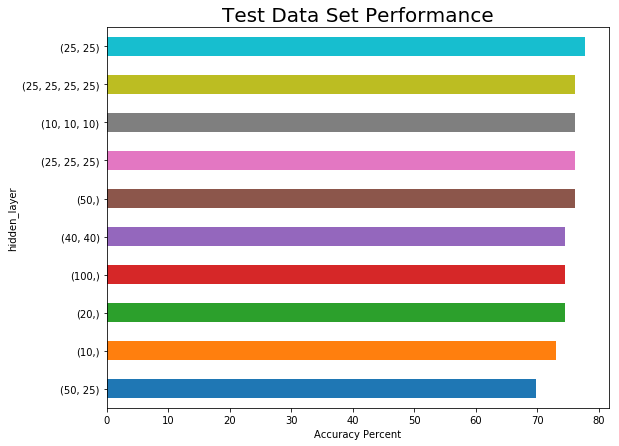

In [25]:
%matplotlib inline
#
# plot test data results
#
result_df.sort_values(by=['test_accuracy'],ascending=[True],inplace=True)
ax = result_df.plot('hidden_layer','test_accuracy','barh',
                    figsize=(9,7),
                    legend=False)
ax.set_xlabel('Accuracy Percent')
ax.set_title('Test Data Set Performance',fontsize=20)